In [68]:
import pandas as pd
import numpy as np

In [69]:
auto_data=pd.read_csv(r'./Data/auto.csv',sep='\s*,\s*',engine='python')

In [70]:
auto_data

,symboling,normalized-losses,make,engine,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [71]:
auto_data['engine-type'].unique()

array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object)

In [72]:
auto_data['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [73]:
auto_data['make'].dtype

dtype('O')

In [74]:
from pandas import Series

In [75]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   engine             205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [76]:
auto_data['horsepower']=pd.to_numeric(auto_data['horsepower'],errors='coerce')

In [77]:
auto_data['price']=pd.to_numeric(auto_data['price'],errors='coerce')

In [78]:
auto_data['peak-rpm']=pd.to_numeric(auto_data['peak-rpm'],errors='coerce')

In [79]:
auto_data['bore']=pd.to_numeric(auto_data['bore'],errors='coerce')

In [80]:
auto_data['stroke']=pd.to_numeric(auto_data['stroke'],errors='coerce')

In [81]:
auto_data['horsepower'].describe()

count    203.000000
mean     104.256158
std       39.714369
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

In [82]:
auto_data['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [83]:
cylinder_dict={'four':4, 'six':6, 'five':5, 'three':3, 'twelve':12, 'two':2, 'eight':8}

In [84]:
auto_data['num-of-cylinders'].replace(cylinder_dict,inplace=True)

In [85]:
auto_data['num-of-cylinders'].sample(10)

84     4
38     4
44     4
83     4
124    4
148    4
66     4
79     4
108    4
16     6
Name: num-of-cylinders, dtype: int64

In [86]:
auto_data['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [87]:
auto_data=auto_data.drop('normalized-losses',axis=1)


In [88]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   make               205 non-null    object 
 2   engine             205 non-null    object 
 3   aspiration         205 non-null    object 
 4   num-of-doors       205 non-null    object 
 5   body-style         205 non-null    object 
 6   drive-wheels       205 non-null    object 
 7   engine-location    205 non-null    object 
 8   wheel-base         205 non-null    float64
 9   length             205 non-null    float64
 10  width              205 non-null    float64
 11  height             205 non-null    float64
 12  curb-weight        205 non-null    int64  
 13  engine-type        205 non-null    object 
 14  num-of-cylinders   205 non-null    int64  
 15  engine-size        205 non-null    int64  
 16  fuel-system        205 non

In [89]:
auto_data=pd.get_dummies(auto_data,columns=['make',
'engine',
'aspiration',
'num-of-doors',
'body-style',
'drive-wheels',
'engine-location',
'fuel-system',
'engine-type'])

In [90]:
auto_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 70 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   wheel-base              205 non-null    float64
 2   length                  205 non-null    float64
 3   width                   205 non-null    float64
 4   height                  205 non-null    float64
 5   curb-weight             205 non-null    int64  
 6   num-of-cylinders        205 non-null    int64  
 7   engine-size             205 non-null    int64  
 8   bore                    201 non-null    float64
 9   stroke                  201 non-null    float64
 10  compression-ratio       205 non-null    float64
 11  horsepower              203 non-null    float64
 12  peak-rpm                203 non-null    float64
 13  city-mpg                205 non-null    int64  
 14  highway-mpg             205 non-null    in

In [91]:
auto_data=auto_data.dropna()

In [92]:
auto_data

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi,engine-type_dohc,engine-type_dohcv,engine-type_l,engine-type_ohc,engine-type_ohcf,engine-type_ohcv,engine-type_rotor
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,1,0,0,1,0,0,0,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,1,0,0,1,0,0,0,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,0,0,0,0,1,0
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,1,0,0,0,0,0,1,0,0,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,1,0,0,0,0,0,1,0,0,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,1,0,0,0,0,0,1,0,0,0
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,1,0,0,0,0,0,0,0,1,0
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,...,0,0,0,0,0,0,1,0,0,0


In [93]:
from yellowbrick.target import FeatureCorrelation

In [94]:
target=auto_data['price']

In [95]:
features=auto_data.drop('price',axis=1)

In [96]:
features.columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'num-of-cylinders', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'make_alfa-romero', 'make_audi', 'make_bmw',
       'make_chevrolet', 'make_dodge', 'make_honda', 'make_isuzu',
       'make_jaguar', 'make_mazda', 'make_mercedes-benz', 'make_mercury',
       'make_mitsubishi', 'make_nissan', 'make_peugot', 'make_plymouth',
       'make_porsche', 'make_renault', 'make_saab', 'make_subaru',
       'make_toyota', 'make_volkswagen', 'make_volvo', 'engine_diesel',
       'engine_gas', 'aspiration_std', 'aspiration_turbo', 'num-of-doors_?',
       'num-of-doors_four', 'num-of-doors_two', 'body-style_convertible',
       'body-style_hardtop', 'body-style_hatchback', 'body-style_sedan',
       'body-style_wagon', 'drive-wheels_4wd', 'drive-wheels_fwd',
       'drive-wheels_rwd', 'engine-location_front', 'engine-location_rear',
       'f

In [97]:
features_names=list(features.columns)

In [98]:
features_names

['symboling',
 'wheel-base',
 'length',
 'width',
 'height',
 'curb-weight',
 'num-of-cylinders',
 'engine-size',
 'bore',
 'stroke',
 'compression-ratio',
 'horsepower',
 'peak-rpm',
 'city-mpg',
 'highway-mpg',
 'make_alfa-romero',
 'make_audi',
 'make_bmw',
 'make_chevrolet',
 'make_dodge',
 'make_honda',
 'make_isuzu',
 'make_jaguar',
 'make_mazda',
 'make_mercedes-benz',
 'make_mercury',
 'make_mitsubishi',
 'make_nissan',
 'make_peugot',
 'make_plymouth',
 'make_porsche',
 'make_renault',
 'make_saab',
 'make_subaru',
 'make_toyota',
 'make_volkswagen',
 'make_volvo',
 'engine_diesel',
 'engine_gas',
 'aspiration_std',
 'aspiration_turbo',
 'num-of-doors_?',
 'num-of-doors_four',
 'num-of-doors_two',
 'body-style_convertible',
 'body-style_hardtop',
 'body-style_hatchback',
 'body-style_sedan',
 'body-style_wagon',
 'drive-wheels_4wd',
 'drive-wheels_fwd',
 'drive-wheels_rwd',
 'engine-location_front',
 'engine-location_rear',
 'fuel-system_1bbl',
 'fuel-system_2bbl',
 'fuel-syst

C:\Users\91911\anaconda3\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\91911\anaconda3\lib\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


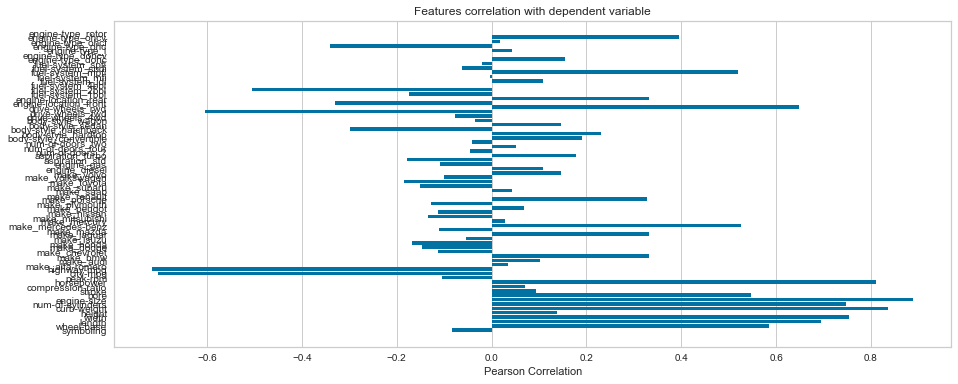

In [99]:
visualizer=FeatureCorrelation(labels=features_names)
visualizer.fit(features,target)
visualizer.poof()

In [100]:
from sklearn.feature_selection import SelectKBest

In [101]:
from sklearn.feature_selection import f_regression,mutual_info_regression

In [102]:
selectUnivariate=SelectKBest(mutual_info_regression,k=50).fit(features,target)

In [103]:
selected_masked=selectUnivariate.get_support()

In [104]:
selected_columns=features.columns[selected_masked]

In [105]:
selected_features=features[selected_columns]

In [106]:
selected_features

,symboling,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,...,drive-wheels_rwd,fuel-system_1bbl,fuel-system_2bbl,fuel-system_idi,fuel-system_mpfi,fuel-system_spdi,engine-type_dohc,engine-type_l,engine-type_ohc,engine-type_ohcv
0,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,1,0,0,0,1,0,1,0,0,0
1,3,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,...,1,0,0,0,1,0,1,0,0,0
2,1,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,...,1,0,0,0,1,0,0,0,0,1
3,2,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
4,2,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,4,141,3.78,3.15,...,1,0,0,0,1,0,0,0,1,0
201,-1,109.1,188.8,68.8,55.5,3049,4,141,3.78,3.15,...,1,0,0,0,1,0,0,0,1,0
202,-1,109.1,188.8,68.9,55.5,3012,6,173,3.58,2.87,...,1,0,0,0,1,0,0,0,0,1
203,-1,109.1,188.8,68.9,55.5,3217,6,145,3.01,3.40,...,1,0,0,1,0,0,0,0,1,0


In [107]:
y=target

In [108]:
from sklearn.preprocessing import scale

In [109]:
x=pd.DataFrame(data=scale(selected_features),columns=selected_features.columns)

In [110]:
from sklearn.model_selection import train_test_split

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

In [123]:
params={'n_estimators':100,'max_depth':4,'min_samples_split':2,'learning_rate':0.05,'loss':'ls'}
gbr_model=GradientBoostingRegressor(**params)
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.05, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [124]:
gbr_model.score(x_train,y_train)

0.994598872722371

In [125]:
y_pred=gbr_model.predict(x_test)

In [126]:
from sklearn.metrics import r2_score

In [127]:
r2_score(y_pred,y_test)

0.8709913288379142

Populating the interactive namespace from numpy and matplotlib


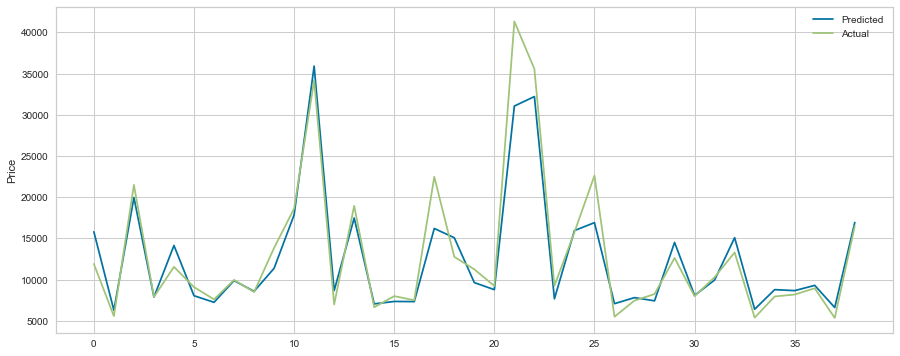

In [128]:
%pylab inline
pylab.rcParams['figure.figsize']=[15,6]
plt.plot(y_pred,label='Predicted')
plt.plot(y_test.values,label='Actual')
plt.ylabel('Price')
plt.legend()
plt.show()


In [119]:
from sklearn.model_selection import GridSearchCV

In [120]:
num_estimators=[100,200,500]
learn_rates=[0.01,0.02,0.05,0.1]
max_depth=[4,6,8]
param_grid={'n_estimators':num_estimators,
            'learning_rate':learn_rates,
            'max_depth':max_depth}

In [121]:
grid_search=GridSearchCV(GradientBoostingRegressor(min_samples_split=2,loss='ls'),param_grid,cv=3,return_train_score=True)
grid_search.fit(x_train,y_train)
grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 100}

In [122]:
grid_search.score(x_train,y_train)

0.994598872722371